Accuracy: 0.925

Confusion Matrix:
 [[72  1]
 [ 8 39]]


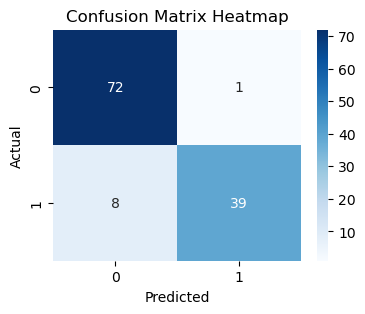

In [5]:
# Naive Bayes Classification
# Dataset: NaiveBayes.csv

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv("NaiveBayes.csv")

# Encode categorical attributes
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Split X and y
X = df.iloc[:, :-1]      # all columns except last
y = df.iloc[:, -1]       # last column = target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Build Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# 2️⃣ Confusion Matrix Heatmap
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
